# Experiments and tests

In [1]:
from PictogramGrid import Pictogram,Page,Grid
from EvaluationGrid import grid_distance_cost,sentence_distance_cost
from gpgo import gpgo
import os

corpus = []

for root, dirs, files in os.walk("training_corpora"):
    for name in files:
        corpus.append(os.path.join(root,name))

my_gpgo= gpgo(corpus,corpus,pop_size=200,cross_proba=0.5,cross_info_rate=0.5,
              mutation_proba=0.5,select_number=50,gen_number=500,randomizer=True)

my_gpgo.display_config()

g = my_gpgo.genetic_algorithm()

####### Genetic Pictogram Grid Communication Optimizer #######

## Optimizer Parameters ##
------------------------------------------------------------------------
  INITIAL POPULATION SIZE : 200

  NUMBER OF GENERATION : 500

  CROSSOVER RATE : 50.0%     MUTATION RATE : 50.0%

  CROSSOVER INFORMATION RATE : 50.0%

------------------------------------------------------------------------



Optimization : 100%|█████████████████████████████████████████████████████████| 500/500 [01:54<00:00,  4.38generation/s]

DEBUG : Best individual --> Generation : 494, Fitness : 1463


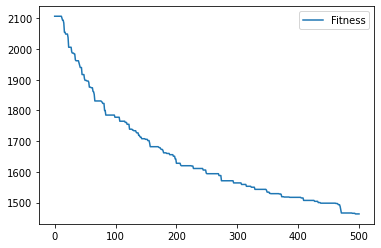

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

g.to_csv()

#Plot the history
hist = my_gpgo.best_history

plt.plot(hist,label = "Fitness")

plt.legend()
plt.show()